<a href="https://colab.research.google.com/github/jerolg/Evaluacion_2021-2/blob/main/1001735333/Examen_2021_2_01_Lopez333_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Parcial 1**

##**Jeronimo Lopez Gomez : CC 1001735333**

In [120]:
#@markdown Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize, interpolate
import random

###Los siguientes datos fueron extraidos de los datos para la cuarta ola de infecciones por millon de  habitantes (IPMH) de Colombia por la variante Omicrón del Coronavirus

###A) Genere un data frame de pandas y agregé una nueva columna de IPMH con una incertidubre del 2 por mil aleatoria. Es decir, a cada IPMH sumarle o restarle un número aleatoria en el rango de su 2 por mil


In [121]:
#@markdown Datos Dataframe 
data = [
    {'día':1,'IPMH':464},
    {'día':2,'IPMH':494},
    {'día':3,'IPMH':532},
    {'día':4,'IPMH':552},
    {'día':5,'IPMH':576},
    {'día':6,'IPMH':589}
]

df = pd.DataFrame.from_dict(data)
df

,día,IPMH
0,1,464
1,2,494
2,3,532
3,4,552
4,5,576
5,6,589


In [122]:
IPMH_err = {'IPMH+err' : []}
for i in range(0,len(df)):
  num = df['IPMH'][i]
  percent = num*2/1000
  err= random.uniform(-percent, percent)  #Num Aleatorio entre - 2/1000 de IPMH y 2/1000 de IPMH
  IPMH_err['IPMH+err'].append(round(df['IPMH'][i]+err,3))

df2=df.join(pd.DataFrame.from_dict(IPMH_err))
df2

,día,IPMH,IPMH+err
0,1,464,463.197
1,2,494,493.278
2,3,532,532.177
3,4,552,552.226
4,5,576,577.075
5,6,589,590.171



###B) Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine (para la columna con incertidumbre)
1. La velocidad inicial de IPMH  en `IPMH/día`
1. La aceleración constante en `IPMH/día**2`
1. El número máximo de IPMH que se alcanzaría
1. El número de días en el que se alcanzaría dicho máximo
1. Realice una gráfico que muestré el ajuste y la posición del máximo usando los estándares adecuados


In [123]:
coeffs = np.polyfit(df2['día'],df2['IPMH+err'],2)

y = lambda t : coeffs[0]*t**2 + coeffs[1]*t + coeffs[2]  #Ecuacion de Movimiento en funcion del tiempo en dias y(t)

y_der, acc = np.polyder(coeffs,1), np.polyder(coeffs,2)  #Velocidad en t y Aceleracion cte

IPMH_vel = lambda t : y_der[0]*t + y_der[1]

IPMH_max, t_max = (-(IPMH_vel(0))**2/(2*acc))+y(0), -IPMH_vel(0)/acc    #Maximos



print('''La Velocidad Inicial esta dada por v0 = %.3f IPMH/día, \nLa aceleración es a = %.3f IPMH/día**2 \nPico o numero máximo de IPMH = %.3f en %.3f días
'''%(IPMH_vel(0),acc,IPMH_max,t_max))
print(coeffs)

La Velocidad Inicial esta dada por v0 = 43.535 IPMH/día, 
La aceleración es a = -5.040 IPMH/día**2 
Pico o numero máximo de IPMH = 608.556 en 8.638 días

[ -2.52008929  43.53519643 420.5355    ]


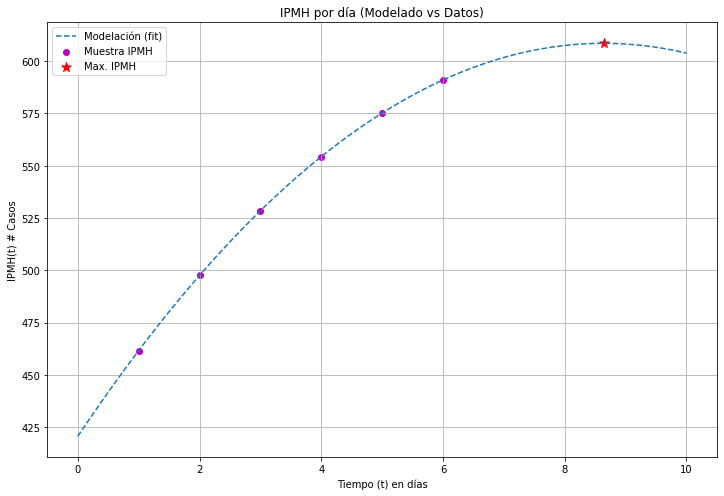

In [124]:
t = np.linspace(0,10,1000)    #T auxiliar para Modelación

plt.figure(figsize=(12,8))
plt.plot(t,y(t), label='Modelación (fit)', linestyle='--')
plt.scatter(df2['día'],y(df2['día']),label='Muestra IPMH',c='m')
plt.scatter(t_max,IPMH_max,c='r',label='Max. IPMH',s=100, marker='*')
plt.ylim((y(0)-10,IPMH_max+10))
plt.title('IPMH por día (Modelado vs Datos)')
plt.ylabel('IPMH(t) # Casos')
plt.xlabel('Tiempo (t) en días')
plt.legend()
plt.grid()
plt.show()